In [201]:
import pandas as pd
import numpy as np
from sklearn import datasets,linear_model
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.metrics import confusion_matrix,precision_score, accuracy_score, recall_score
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [202]:
data = pd.read_csv('Wine.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [203]:
data.shape

(178, 14)

In [204]:
# Revisión de los tipos de datos
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [205]:
# Valores nulos
for feature in data.columns:
    print('Total de valores nulos de', feature, '=', data[feature].isna().sum())

Total de valores nulos de Alcohol = 0
Total de valores nulos de Malic_Acid = 0
Total de valores nulos de Ash = 0
Total de valores nulos de Ash_Alcanity = 0
Total de valores nulos de Magnesium = 0
Total de valores nulos de Total_Phenols = 0
Total de valores nulos de Flavanoids = 0
Total de valores nulos de Nonflavanoid_Phenols = 0
Total de valores nulos de Proanthocyanins = 0
Total de valores nulos de Color_Intensity = 0
Total de valores nulos de Hue = 0
Total de valores nulos de OD280 = 0
Total de valores nulos de Proline = 0
Total de valores nulos de Customer_Segment = 0


In [206]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


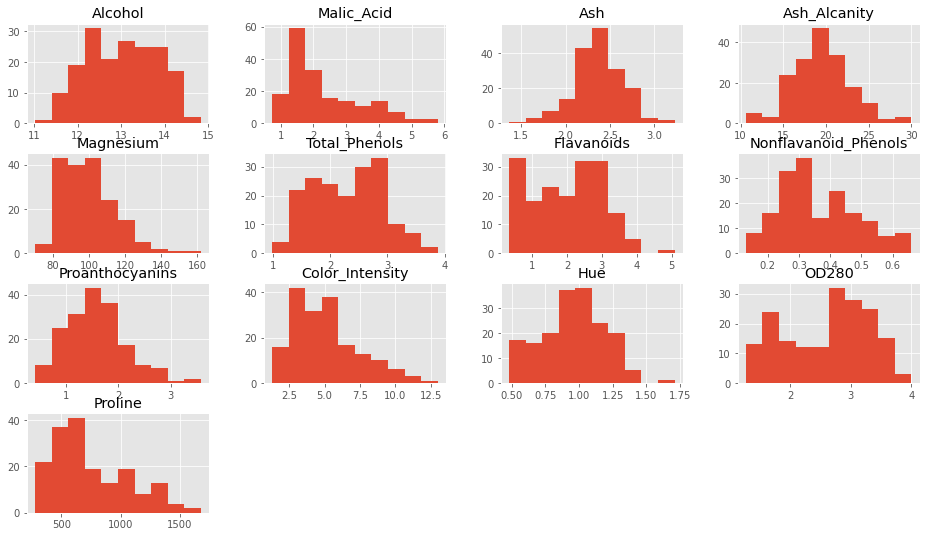

In [207]:
data.drop(['Customer_Segment'], axis = 1).hist()
plt.show()

In [208]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [209]:
#Filtro los datos para quitar los outliers
data_filtrada = data[(data['Alcohol'] >= 11.5) & (data['Alcohol'] <= 14.5)
                     & (data['Malic_Acid']  >= 1) & (data['Malic_Acid']  <= 4)
                    & (data['Ash'] >= 1.7) & (data['Ash'] <= 2.7) 
                     & (data['Ash_Alcanity'] >= 15) & (data['Ash_Alcanity'] <= 25)
                    & (data['Magnesium'] <= 120)
                    & (data['Total_Phenols'] >= 1.5) & (data['Total_Phenols'] <= 4.5)
                    & (data['Flavanoids'] <= 4)
                    & (data['Proanthocyanins'] <= 2.5)
                    & (data['Hue'] <= 1.5)]
data_filtrada

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1
10,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,1
11,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695,3
168,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750,3
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3


In [210]:
#Guardo los datos filtrados en un csv
data_filtrada.to_csv('vinos_filtrado.csv')
data = pd.read_csv('vinos_filtrado.csv')

In [211]:
#Se selecciona unos datos al azar para posteriormente verificar el clúster 
#al que pertenecen
indices = [22, 52, 90]
muestras = pd.DataFrame(data.loc[indices], 
                       columns = data.keys()).reset_index(drop = True)
muestras = muestras.drop(['Unnamed: 0','Customer_Segment'], axis = 1)
muestras

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
1,11.84,2.89,2.23,18.0,112,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500
2,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675


In [212]:
data = data.drop(indices, axis = 0)
data

,Unnamed: 0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
1,5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
2,9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1
3,10,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,1
4,11,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,166,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695,3
96,168,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750,3
97,172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,3
98,174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3


In [213]:
data = data.drop(['Unnamed: 0','Customer_Segment'], axis = 1)
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
2,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
3,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510
4,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695
96,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750
97,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
98,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750


In [214]:
#Se realiza el escalamiento de los datos
from sklearn import preprocessing

data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [215]:
### ANÁLISIS DE MACHINE LEARNING ###

#Se determina las variables a evaluar
from sklearn.cluster import KMeans

X = data_escalada.copy()
X

array([[9.67995483e-03, 1.31356381e-03, 1.68405616e-03, ...,
        5.79315321e-04, 2.32399751e-03, 9.96961249e-01],
       [9.76281317e-03, 1.21003881e-03, 1.68442903e-03, ...,
        7.21898157e-04, 1.95943785e-03, 9.96906978e-01],
       [1.32019634e-02, 1.28590552e-03, 2.16222633e-03, ...,
        9.62047836e-04, 3.38145527e-03, 9.95386128e-01],
       ...,
       [2.12363700e-02, 3.76435655e-03, 3.71936424e-03, ...,
        9.29841059e-04, 2.56456163e-03, 9.89830805e-01],
       [1.76914658e-02, 5.16221128e-03, 3.27424143e-03, ...,
        9.24181048e-04, 2.05960348e-03, 9.90193980e-01],
       [1.55136606e-02, 3.05090212e-03, 2.79175213e-03, ...,
        7.06772691e-04, 1.90828627e-03, 9.89481768e-01]])

In [216]:
#Hallar el valor optimo de K
#Se aplicara el metodo del codo para hallar K
#Se calcula el algoritmo de agrupacion para diferentes calores de K
inercia = []
for i in range(1,20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++',
                      max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    #Para cada K, se calcula la suma total del cuadro dentro del cluster
    inercia.append(algoritmo.inertia_)
    
inercia

[0.36499641680882106,
 0.1159410989571403,
 0.051170233704318016,
 0.027696524519692137,
 0.01803084763062379,
 0.013450647438766995,
 0.010866834469749424,
 0.008861342409240724,
 0.007399951531333645,
 0.006844334849876614,
 0.006438359393782104,
 0.005769598648143465,
 0.0053153409499799905,
 0.005094057862077734,
 0.004704636743982477,
 0.004221991426250653,
 0.003854734263514095,
 0.0036097384978569015,
 0.0033049764841641452]

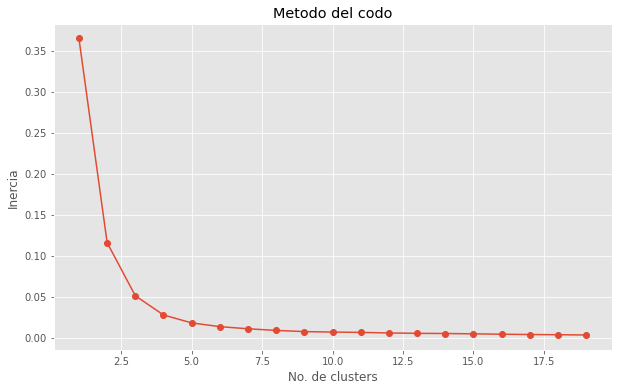

In [217]:
#Se traza la curva de la suma de errores cuadraticos
plt.figure(figsize=[10,6])
plt.title('Metodo del codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1,20)), inercia, marker = 'o')
plt.show()

SELECCIONAMOS 3 CLUSTERS

In [218]:
#Se aplica el algoritmo de clustering
#Se define el algoritmo junto con el valor de K
algoritmo = KMeans(n_clusters = 3, init = 'k-means++',
                  max_iter = 300, n_init = 10)

In [219]:
#Se entrena el algoritmo
algoritmo.fit(X)

KMeans(n_clusters=3)

In [220]:
#Utilizamos los datos de muestras y verificamos en que cluster se encuentran
muestra_prediccion = algoritmo.predict(muestras_escalada)

In [221]:
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_
print(centroides)
print(etiquetas)

[[1.23007919e-02 1.63671890e-03 2.16855918e-03 1.62661481e-02
  9.17626948e-02 2.53278883e-03 2.60323867e-03 2.51199720e-04
  1.65817129e-03 4.75838738e-03 9.63542016e-04 2.87077245e-03
  9.95400843e-01]
 [3.23323579e-02 5.26938827e-03 5.83165984e-03 5.31119041e-02
  2.40118019e-01 6.26358476e-03 5.72803824e-03 9.57540803e-04
  3.86820528e-03 7.81020738e-03 2.63625400e-03 7.41839753e-03
  9.67957357e-01]
 [2.04709320e-02 3.75295676e-03 3.68030029e-03 3.20774512e-02
  1.49272449e-01 3.32705161e-03 2.53734146e-03 6.54187451e-04
  2.28302347e-03 7.96584253e-03 1.49964452e-03 3.85636329e-03
  9.87790667e-01]]
[0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 2 1 2 1 1 2 2 2 1 2 0 1 1 0 2 2 2 2 0 2 1 1 2 2 2 1 1 2 1 2 1 2 1 1 2
 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [222]:
for i, pred in enumerate(muestra_prediccion):
    print('Muestra', i, ' se encuentra en el cluster: ', pred)

Muestra 0  se encuentra en el cluster:  0
Muestra 1  se encuentra en el cluster:  1
Muestra 2  se encuentra en el cluster:  2


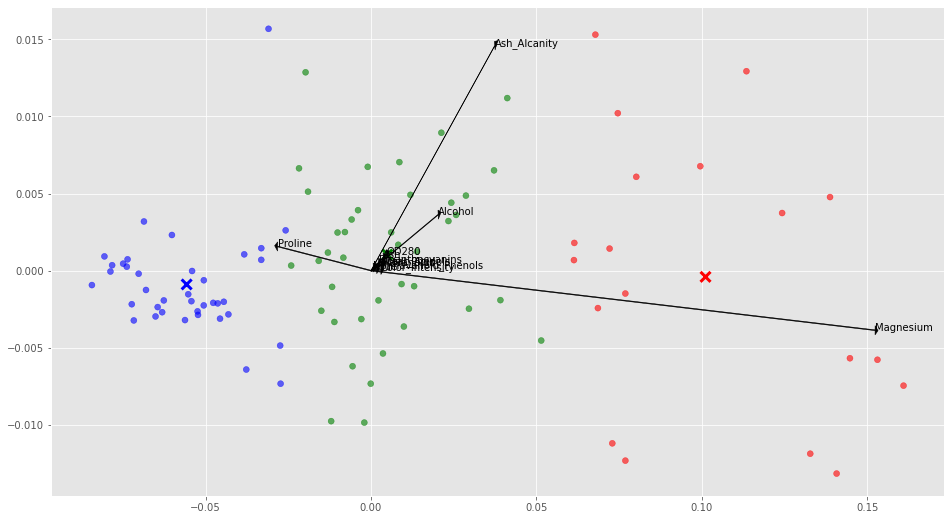

In [223]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 
#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)
# Se define los colores de cada clúster
colores = ['blue', 'red', 'green']
#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]
#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.6)
#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)
#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns
#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.00005, head_width = 0.0006, alpha = 1)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=1)
plt.show()

In [224]:
# Compute the silhouette scores for each algorithm
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(X, algoritmo.labels_).round(2)
kmeans_silhouette = kmeans_silhouette
kmeans_silhouette

0.57

In [225]:
from sklearn.metrics import davies_bouldin_score
kmeans_daviesBouldin = davies_bouldin_score(X, algoritmo.labels_)
kmeans_daviesBouldin = kmeans_daviesBouldin
kmeans_daviesBouldin

0.5327324320008414

In [226]:
from sklearn.metrics import calinski_harabasz_score
kmeans_calinski_harabasz_score = calinski_harabasz_score(X, algoritmo.labels_)
kmeans_calinski_harabasz_score = kmeans_calinski_harabasz_score
kmeans_calinski_harabasz_score

288.2502099001939

In [227]:
#EXPORTAR RESULTADOS METRICAS KMEANS

In [228]:
metricasKMeans = [kmeans_silhouette,kmeans_daviesBouldin,kmeans_calinski_harabasz_score]
metricasKMeans

[0.57, 0.5327324320008414, 288.2502099001939]

In [229]:
metricas = pd.DataFrame(metricasKMeans)
metricas

,0
0,0.570000
1,0.532732
2,288.250210


In [230]:
metricas.to_csv('metricasKMeans.csv')